# Example 3 - Parallel Inclined Layers

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 700 m wide (W-E extent) and 788 m high (N-S extent). 
<img src="../../../gemgis/data/examples/example3/task3.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\core\grid_modules\create_topography.py:242: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i is not 0 or j is not 0:
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\core\grid_modules\create_topography.py:242: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i is not 0 or j is not 0:
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\core\grid_modules\create_topography.py:249: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 0:
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\core\grid_modules\create_topography.py:254: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if j is 0:
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This i

# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example3/task3.png')
interfaces = gpd.read_file('../../../gemgis/data/examples/example3/interfaces3_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example3/orientations3.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example3/extent3.shp')
geological_map = gpd.read_file('../../../gemgis/data/examples/example3/geolmap3.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example3/topo3.shp')
# custom_section = gpd.read_file('../../../gemgis/data/examples/example3/customsections1.shp')

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\rasterio\__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


# Inspect Data

In [3]:
interfaces.head()

,id,formation,geometry
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38..."
1,None,Layer1,"LINESTRING (631.470 216.874, 609.097 222.125, ..."


In [4]:
orientations.head()

,id,dip,azimuth,formation,geometry
0,None,36,166,Layer1,POINT (137.735 636.168)
1,None,28,163,Layer1,POINT (185.477 479.750)
2,None,30,174,Layer1,POINT (171.029 153.094)
3,None,40,154,Layer1,POINT (465.019 222.822)
4,None,37,183,Layer1,POINT (575.580 390.547)


In [5]:
extent.head()

,id,geometry
0,None,"POLYGON ((0.000 0.000, 0.000 788.000, 700.000 ..."


In [6]:
geological_map.head()

,id,formation,geometry
0,None,basement,"POLYGON ((0.000 0.000, 0.000 788.000, 700.000 ..."
1,None,Layer1,"POLYGON ((631.470 216.874, 609.097 222.125, 58..."
2,None,Layer1,"POLYGON ((70.308 -0.240, 62.317 20.308, 56.381..."


In [7]:
topo.head()

,id,Z,geometry
0,None,600,"LINESTRING (15.116 787.112, 22.878 758.803, 29..."
1,None,600,"LINESTRING (450.485 786.656, 457.791 773.642, ..."
2,None,500,"LINESTRING (1.189 660.177, 11.235 642.598, 21...."
3,None,400,"LINESTRING (0.790 532.842, 12.776 506.360, 26...."
4,None,300,"LINESTRING (3.872 351.115, 20.310 331.025, 34...."


# Create GemPy Data Class

In [8]:
geo_data = gg.GemPyData(model_name='Model3', 
                        crs='EPSG:4326')

In [9]:
vars(geo_data)

{'model_name': 'Model3',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

# Set Extent

In [10]:
geo_data.set_extent(gdf=extent, minz=100, maxz=700)
geo_data.extent

[0.0, 700.0, 0.0, 788.0, 100, 700]

# Set Resolution

In [11]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Loading Layer Style

In [12]:
cols = gg.utils.load_surface_colors('../../../gemgis/data/examples/example3/style3.qml', geological_map)
cols

['#b35a2a', '#525252']

# Attribute Data to Data Class

In [13]:
geo_data.set_extent(0.0, 700.0, 0.0, 788.0, 100, 700)
geo_data.extent

[0.0, 700.0, 0.0, 788.0, 100, 700]

In [14]:
geo_data.raw_i = interfaces
geo_data.raw_i

,id,formation,geometry
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38..."
1,None,Layer1,"LINESTRING (631.470 216.874, 609.097 222.125, ..."


In [15]:
geo_data.raw_o = orientations
geo_data.raw_o

,id,dip,azimuth,formation,geometry
0,None,36,166,Layer1,POINT (137.735 636.168)
1,None,28,163,Layer1,POINT (185.477 479.750)
2,None,30,174,Layer1,POINT (171.029 153.094)
3,None,40,154,Layer1,POINT (465.019 222.822)
4,None,37,183,Layer1,POINT (575.580 390.547)
5,None,29,183,Layer1,POINT (547.940 582.144)
6,None,47,183,Layer1,POINT (531.607 714.063)


In [16]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[255, 254, 241, ..., 223, 238, 225],
       [251, 245, 224, ..., 217, 236, 239],
       [245, 232, 204, ..., 212, 228, 233],
       ...,
       [242, 233, 216, ..., 217, 237, 232],
       [249, 240, 223, ..., 224, 243, 237],
       [254, 246, 228, ..., 233, 252, 245]], dtype=uint8)

In [17]:
geo_data.geolmap = geological_map
geo_data.geolmap

,id,formation,geometry
0,None,basement,"POLYGON ((0.000 0.000, 0.000 788.000, 700.000 ..."
1,None,Layer1,"POLYGON ((631.470 216.874, 609.097 222.125, 58..."
2,None,Layer1,"POLYGON ((70.308 -0.240, 62.317 20.308, 56.381..."


In [18]:
geo_data.contours = topo
geo_data.contours

,id,Z,geometry
0,None,600,"LINESTRING (15.116 787.112, 22.878 758.803, 29..."
1,None,600,"LINESTRING (450.485 786.656, 457.791 773.642, ..."
2,None,500,"LINESTRING (1.189 660.177, 11.235 642.598, 21...."
3,None,400,"LINESTRING (0.790 532.842, 12.776 506.360, 26...."
4,None,300,"LINESTRING (3.872 351.115, 20.310 331.025, 34...."
5,None,200,"LINESTRING (1.589 209.340, 21.223 177.378, 35...."
6,None,100,"LINESTRING (390.385 0.217, 389.928 10.719, 393..."


# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

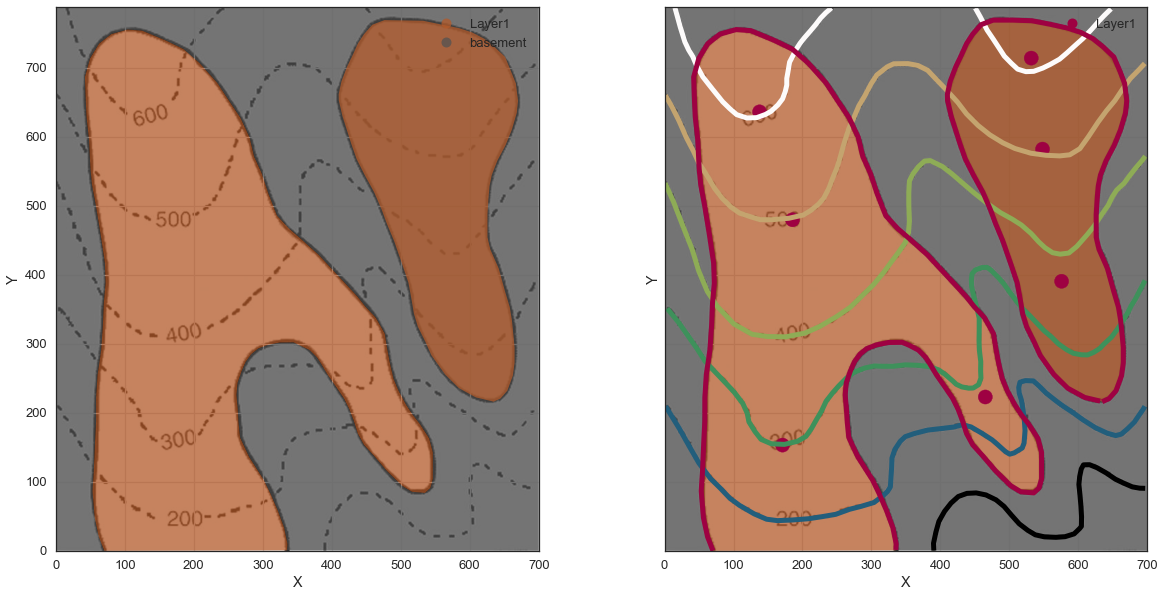

In [19]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_geolmap=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_geolmap = cols, 
                           cmap_contours='gist_earth'
                           )

# Interpolate Topography

In [20]:
dem = gg.vector.interpolate_raster(topo, method='rbf', extent=geo_data.extent[:4])
geo_data.raw_dem = dem
geo_data.raw_dem

array([[594.7286396 , 595.0786458 , 595.42697411, ..., 572.88499167,
        572.41204033, 571.94354604],
       [594.3884797 , 594.74414324, 595.09820769, ..., 572.17792746,
        571.70284861, 571.23230701],
       [594.05411125, 594.41609185, 594.77663752, ..., 571.46581068,
        570.98865192, 570.51611061],
       ...,
       [178.84797838, 178.76901245, 178.69187761, ..., 101.5872776 ,
        101.80670997, 102.03009421],
       [178.83460967, 178.75458494, 178.67637548, ..., 101.69002983,
        101.90898762, 102.13185579],
       [178.821839  , 178.74075975, 178.66148011, ..., 101.79339998,
        102.01190397, 102.23427728]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

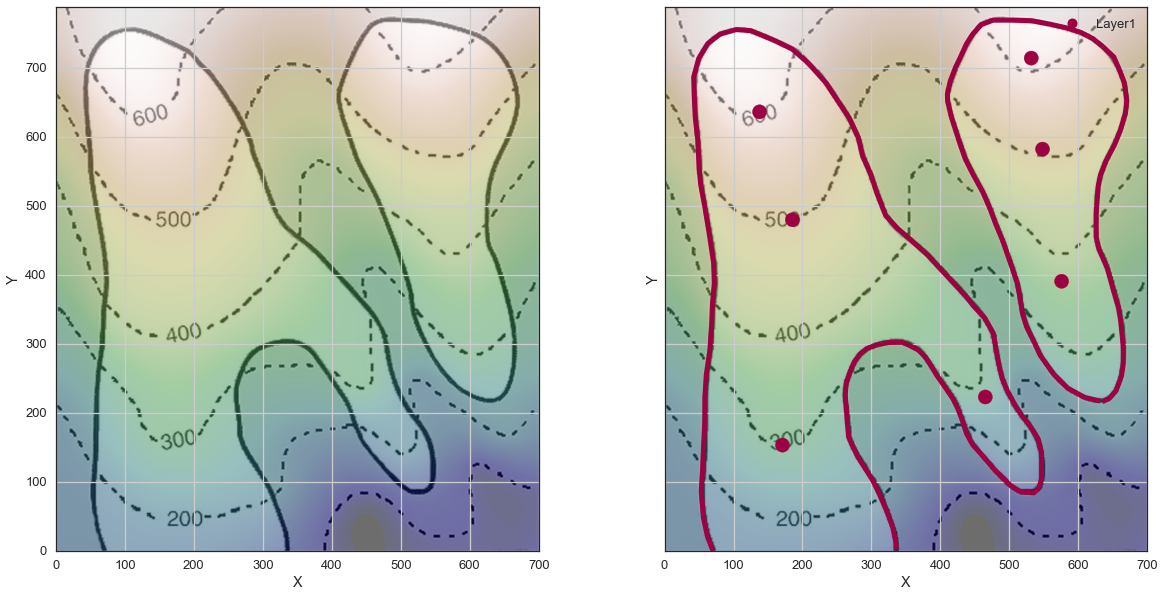

In [21]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )

# Save Topography as Raster

In [22]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example3/topo.tif',np.flipud(dem), crs='EPSG:4326', extent=geo_data.extent[:4])

In [23]:
topography = rasterio.open('../../../gemgis/data/examples/example3/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example3/topo.tif' mode='r'>

# Set Interfaces

In [24]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,dem, extent=geo_data.extent)
interfaces_coords.head()

,id,formation,geometry,points,X,Y,Z
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38...","(70.16589982172896, 0.06179706003696683)",70.17,0.06,177.20
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38...","(62.31698542002265, 20.307514503784773)",62.32,20.31,179.45
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38...","(56.38116928150073, 47.93188960998289)",56.38,47.93,182.95
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38...","(53.1849605915274, 86.5146945103753)",53.18,86.51,189.79
0,None,Layer1,"LINESTRING (70.166 0.062, 62.317 20.308, 56.38...","(55.01136555722646, 114.13906961657345)",55.01,114.14,198.36


In [25]:
geo_data.to_gempy_df(interfaces_coords.sample(n=85), 'interfaces')
geo_data.interfaces.head()

,index,X,Y,Z,formation
0,1,501.57,416.87,332.55,Layer1
1,1,428.28,589.92,449.84,Layer1
2,0,263.68,205.46,276.99,Layer1
3,0,394.27,254.77,294.79,Layer1
4,0,42.23,686.72,584.20,Layer1


# Set Orientations

In [26]:
orientations_coords = gg.vector.extract_coordinates(orientations,dem,extent=geo_data.extent)
orientations_coords

,id,dip,azimuth,formation,geometry,X,Y,Z
0,None,36.00,166.00,Layer1,POINT (137.735 636.168),137.74,636.17,603.68
1,None,28.00,163.00,Layer1,POINT (185.477 479.750),185.48,479.75,498.52
2,None,30.00,174.00,Layer1,POINT (171.029 153.094),171.03,153.09,299.18
3,None,40.00,154.00,Layer1,POINT (465.019 222.822),465.02,222.82,262.85
4,None,37.00,183.00,Layer1,POINT (575.580 390.547),575.58,390.55,358.51
5,None,29.00,183.00,Layer1,POINT (547.940 582.144),547.94,582.14,507.46
6,None,47.00,183.00,Layer1,POINT (531.607 714.063),531.61,714.06,608.88


In [27]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,137.74,636.17,603.68,Layer1,36.00,166.00,1
1,1,185.48,479.75,498.52,Layer1,28.00,163.00,1
2,2,171.03,153.09,299.18,Layer1,30.00,174.00,1
3,3,465.02,222.82,262.85,Layer1,40.00,154.00,1
4,4,575.58,390.55,358.51,Layer1,37.00,183.00,1


# Check Data Class

In [28]:
vars(geo_data)

{'model_name': 'Model3',
 'crs': 'EPSG:4326',
 'extent': [0.0, 700.0, 0.0, 788.0, 100, 700],
 'resolution': [50, 50, 50],
 'interfaces':     index      X      Y      Z formation
 0       1 501.57 416.87 332.55    Layer1
 1       1 428.28 589.92 449.84    Layer1
 2       0 263.68 205.46 276.99    Layer1
 3       0 394.27 254.77 294.79    Layer1
 4       0  42.23 686.72 584.20    Layer1
 ..    ...    ...    ...    ...       ...
 80      1 421.66 610.69 466.59    Layer1
 81      0 417.78 220.76 269.04    Layer1
 82      0  68.25 326.92 360.93    Layer1
 83      1 654.53 231.94 237.85    Layer1
 84      0  58.44 221.90 256.25    Layer1
 
 [85 rows x 5 columns],
 'orientations':    index      X      Y      Z formation   dip  azimuth  polarity
 0      0 137.74 636.17 603.68    Layer1 36.00   166.00         1
 1      1 185.48 479.75 498.52    Layer1 28.00   163.00         1
 2      2 171.03 153.09 299.18    Layer1 30.00   174.00         1
 3      3 465.02 222.82 262.85    Layer1 40.00   154.0

# Add Section Dict

# Add Surface Colors

In [29]:
geo_data.to_surface_color_dict('../../../gemgis/data/examples/example3/style3.qml')
geo_data.surface_colors

{'Layer1': '#b35a2a', 'basement': '#525252'}

# Add Stack

In [30]:
geo_data.stack = {"Strat_Series": ('Layer1')}
geo_data.stack

{'Strat_Series': 'Layer1'}

# Add DEM

In [31]:
geo_data.dem = '../../../gemgis/data/examples/example3/raster3.tif'
geo_data.dem

'../../../gemgis/data/examples/example3/raster3.tif'

# Visualize Data Set

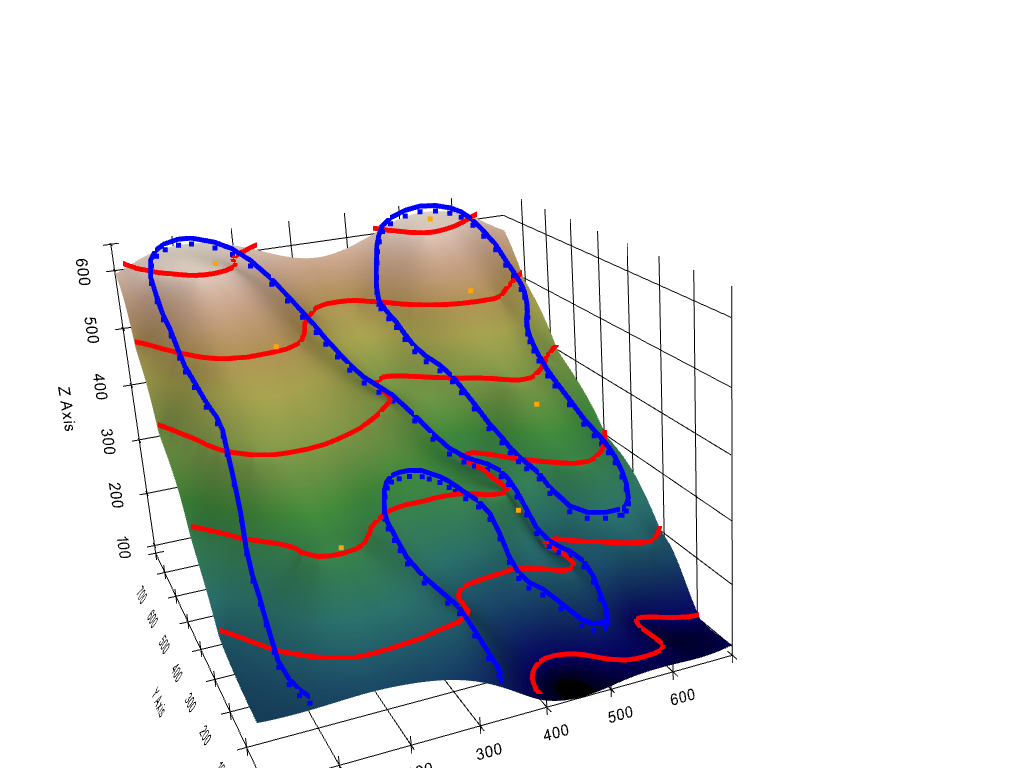

In [33]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(np.flipud(dem), p, cmap = 'gist_earth', extent=geo_data.extent[:4])
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [34]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\gemgis\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [35]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model3  2020-10-04 11:18

In [36]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model3  2020-10-04 11:18

In [37]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Layer1,Default series,1,#015482,1


In [38]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Layer1,Strat_Series,1,#015482,1
1,basement,Strat_Series,2,#9f0052,2


In [39]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [40]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example3/topo.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  7.        ,   7.88      , 106.        ],
       [  7.        ,   7.88      , 118.        ],
       [  7.        ,   7.88      , 130.        ],
       ...,
       [699.5       , 785.5       , 570.51611328],
       [699.5       , 786.5       , 571.2322998 ],
       [699.5       , 787.5       , 571.94354248]])

In [41]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1212.82
$C_o$           35022.48
drift equations      [3]


In [42]:
sol = gp.compute_model(geo_model)

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

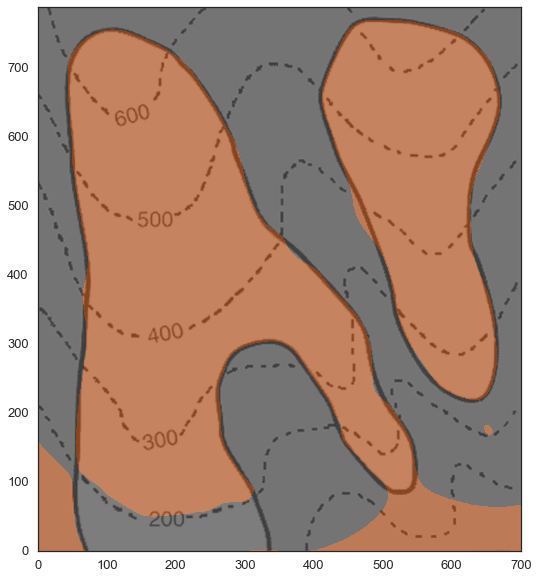

In [43]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a','#525252', ]
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


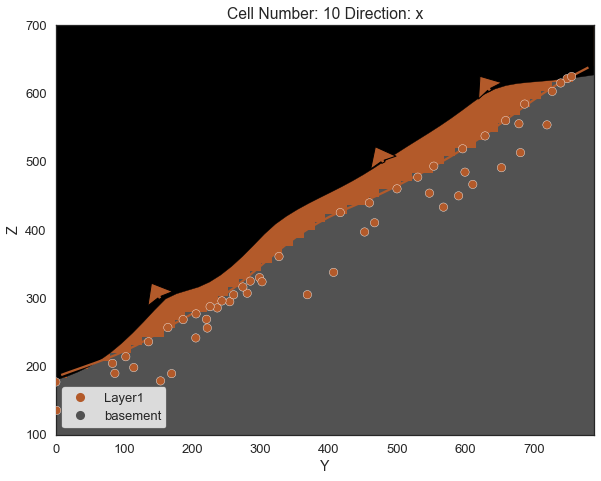

In [44]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


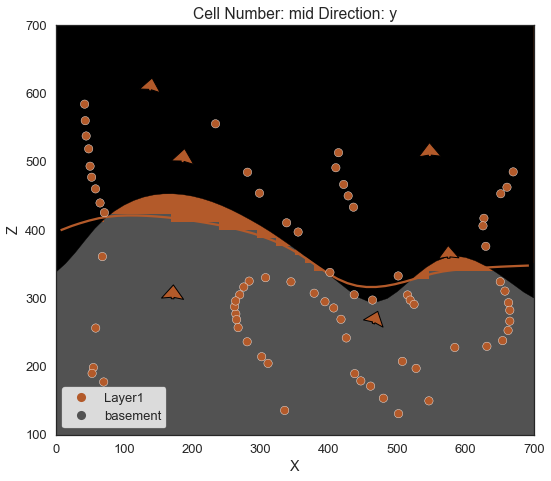

In [45]:
gp.plot_2d(geo_model, direction='y', show_topography=True)

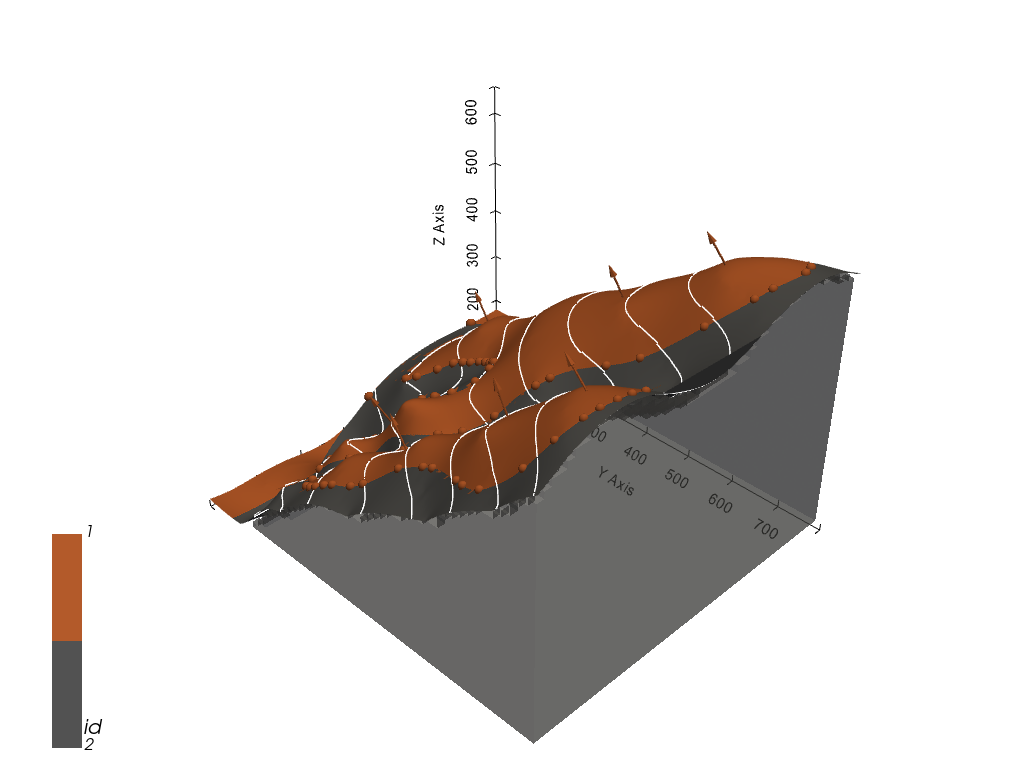

In [46]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [47]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

,formation,geometry
0,basement,"POLYGON ((69.500 0.510, 68.777 1.500, 68.500 1..."
1,Layer1,"POLYGON ((1.500 0.500, 2.500 0.500, 3.500 0.50..."
2,Layer1,"POLYGON ((306.500 0.500, 307.500 0.500, 308.50..."
3,Layer1,"POLYGON ((396.500 0.500, 397.500 0.500, 398.50..."
4,Layer1,"POLYGON ((653.500 168.259, 654.500 167.933, 65..."
5,Layer1,"POLYGON ((625.500 219.415, 626.500 219.239, 62..."


## Plot Polygons

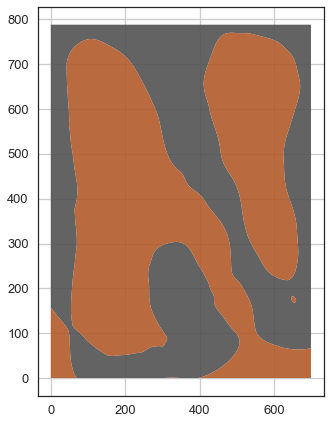

In [48]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [49]:
gdf.to_file('../../../gemgis/data/examples/example3/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [50]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example3/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            600.17
$C_o$           8576.19
drift equations     [3]


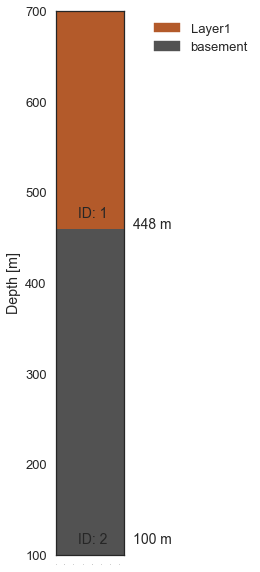

In [51]:
sol = gg.post.extract_borehole(geo_model, geo_data, [200,500])

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

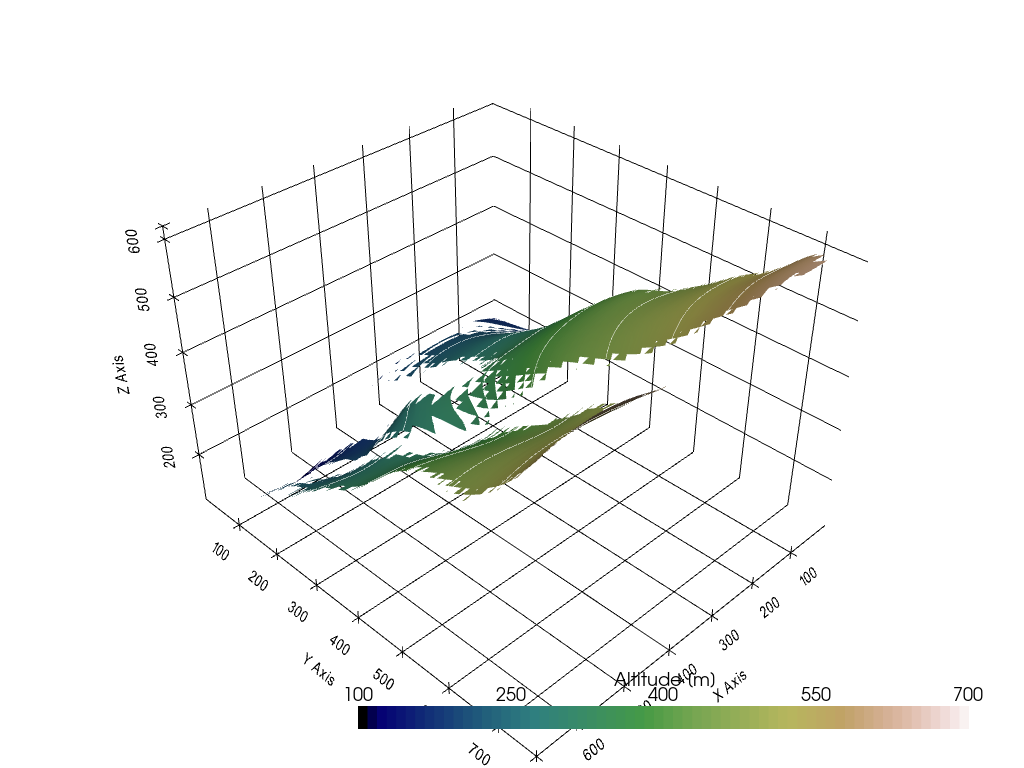

In [52]:
gg.visualization.plot_depth_map(geo_model, 'Layer1', clim=[100, 700], notebook=True)